# Regression Vs Classification - Group 29
## Team Members: Sagarika, Samridh, Shivakshi
### Introduction
Regression and Classification are two different types of machine learning models. Regression works on predicting continuous values (like exact scores), while Classification works on categorical things (like High/Low performance). In this project, we compare these two approaches, their metrics, and discuss the results when we use these models on the same student performance dataset.

### We used the Student Performance Multilingual dataset which contains information about students including:

#### 1) Study hours
#### 2) Sleep hours
#### 3) Previous academic scores
#### 4) Gender and study methods
#### 5) Performance Index (numerical scores from 0-100)
#### 6) Multilingual text data (English and Hindi)


## What We Compare
### Regression Model:

#### 1) Uses Linear Regression
#### 2) Predicts exact Performance Index scores
#### 3) Evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE)

### Classification Model:

#### 1)Uses Logistic Regression
#### 2)Predicts High/Low performance categories
#### 3) Evaluated using Accuracy percentage


# Regression code using student performance data from Kaggle

In [ ]:
from google.colab import files
import pandas as pd
f=files.upload()
dataset=pd.read_csv("Student_Performance_Multilingual.csv")
dataset.head()


Saving Student_Performance_Multilingual.csv to Student_Performance_Multilingual.csv


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,English_Text,Hindi_Text
0,7,99,Yes,9,1,91.0,"The student studied 7 hours, had a previous sc...","छात्र ने 7 घंटे का अध्ययन किया, 99 का पिछला स्..."
1,4,82,No,4,2,65.0,"The student studied 4 hours, had a previous sc...","छात्र ने 4 घंटे का अध्ययन किया, 82 का पिछला स्..."
2,8,51,Yes,7,2,45.0,"The student studied 8 hours, had a previous sc...","छात्र ने 8 घंटे का अध्ययन किया, 51 का पिछला स्..."
3,5,52,Yes,5,2,36.0,"The student studied 5 hours, had a previous sc...","छात्र ने 5 घंटे का अध्ययन किया, 52 का पिछला स्..."
4,7,75,No,8,5,66.0,"The student studied 7 hours, had a previous sc...","छात्र ने 7 घंटे का अध्ययन किया, 75 का पिछला स्..."


-Above, we have uploaded the dataset from our system.

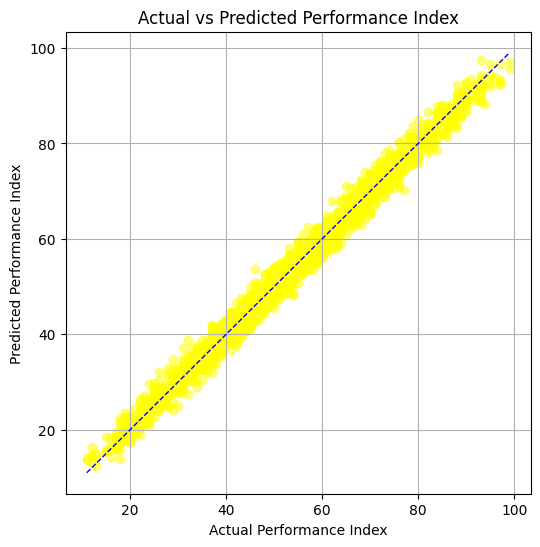

REGRESSION RESULTS:
Mean Absolute Error: 1.61
Mean Squared Error: 4.08


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("Student_Performance_Multilingual.csv")
target_variable="Performance Index"
feature_vector=[c for c in dataset.columns if c!=target_variable and c not in ["English_Text", "Hindi_Text"]]
x=pd.get_dummies(dataset[feature_vector], drop_first=True)
y=dataset[target_variable]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_predictions=model.predict(x_test)
mean_absol_e=mean_absolute_error(y_test, y_predictions)
mean_squared_e=mean_squared_error(y_test, y_predictions)
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_predictions,color="yellow",alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"b--",lw=1)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index")
plt.grid(True)
plt.show()
print("REGRESSION RESULTS:")
print(f"Mean Absolute Error: {mean_absol_e:.2f}")
print(f"Mean Squared Error: {mean_squared_e:.2f}")


#Explanation of the code:
-After loading the dataset and importing the necessary libraries, we set the target variable, which in this case is the performance index.  
-Then we convert all the feature column variables to numeric  
-Then, store the target variable in y and split the data into training and testing sets  
-Create a linear regression model and fit it on the training data.  
-Calculate mean absolute error,mean squared error  
-Plot the graph using matplotlib  
-The dataset used here is multilingual- it contains both English and Hindi text columns, however the model has been trained to ignore raw text and focus only on numerical/categorical columns.  

Also here we are using the **Least Square Linear Regression Model**


# Moving towards classification now

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


Classification target created:
High Performance: (>50)5744 students
Low Performance: (<=50)4256 students

Classification Results:
Accuracy: 0.97(96.8%)


<function matplotlib.pyplot.show(close=None, block=None)>

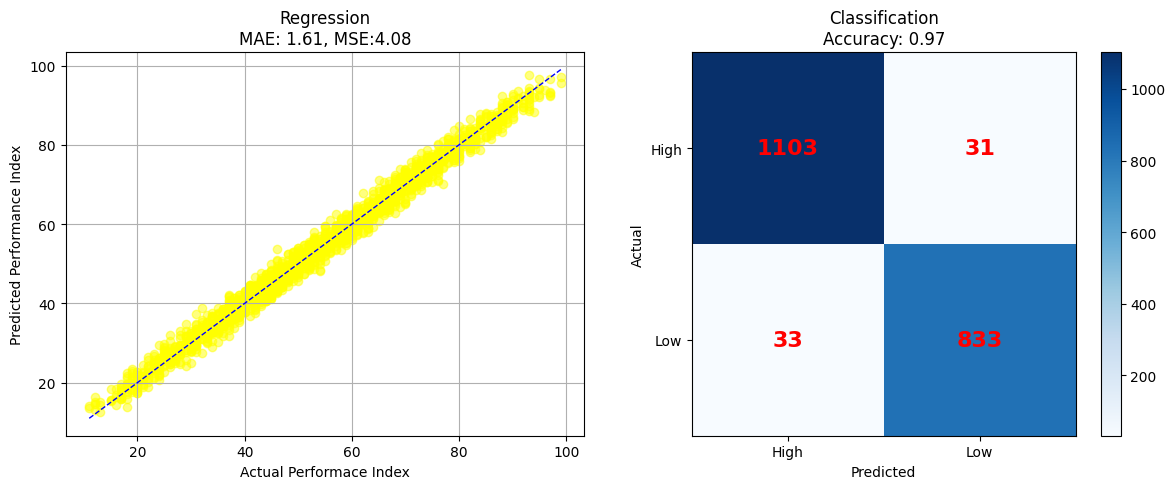

In [ ]:
y_classification = (y> 50).astype(int)
y_classification = y_classification.map({1: 'High', 0: 'Low'})
print(f"Classification target created:")
print(f"High Performance: (>50){(y_classification == 'High').sum()} students")
print(f"Low Performance: (<=50){(y_classification == 'Low').sum()} students")
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x, y_classification, test_size=0.2, random_state=42)
classification_model = LogisticRegression(random_state=42)
classification_model.fit(x_train_clf, y_train_clf)
y_pred_clf = classification_model.predict(x_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)

print(f"\nClassification Results:")
print(f"Accuracy: {accuracy:.2f}({accuracy*100:.1f}%)")
plt.figure(figsize=(12,5))
#Plotting Regression Plot side by side
plt.subplot(1,2,1)
plt.scatter(y_test, y_predictions, color= "yellow", alpha = 0.5 )
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], "b--", lw = 1)
plt.xlabel("Actual Performace Index")
plt.ylabel("Predicted Performance Index")
plt.title(f"Regression\nMAE: {mean_absol_e:.2f}, MSE:{mean_squared_e:.2f}")
plt.grid(True)
plt.subplot(1,2,2)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
categories = ['High', 'Low']
plt.imshow(cm, interpolation='nearest', cmap = 'Blues')
plt.title(f'Classification\nAccuracy: {accuracy:.2f}')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories)
plt.yticks(tick_marks, categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# ;(tick_marks, categories)
plt.yticks(tick_marks, categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
for i in range(2):
  for j in range(2):
    plt.text(j, i, cm[i, j], ha="center", va="center", color = 'red', fontsize= 16, fontweight='bold')
plt.tight_layout()
plt.show




Classification target created:
High Performance: (>50) 5744 students
Low Performance: (<=50) 4256 students

Classification Results:
Accuracy: 0.97 (96.8%)

Misclassification Analysis:
Total misclassified cases: 64

Detailed Analysis of Misclassified Cases:
Case 1:
  Actual: High (Score: 52.00)
  Predicted: Low
  Confidence for 'High': 0.805
  Distance from boundary (0.5): 0.305
  Close to boundary (< 0.1): No
----------------------------------------
Case 2:
  Actual: High (Score: 53.00)
  Predicted: Low
  Confidence for 'High': 0.625
  Distance from boundary (0.5): 0.125
  Close to boundary (< 0.1): No
----------------------------------------
Case 3:
  Actual: High (Score: 52.00)
  Predicted: Low
  Confidence for 'High': 0.643
  Distance from boundary (0.5): 0.143
  Close to boundary (< 0.1): No
----------------------------------------
Case 4:
  Actual: High (Score: 51.00)
  Predicted: Low
  Confidence for 'High': 0.846
  Distance from boundary (0.5): 0.346
  Close to boundary (< 0.1):

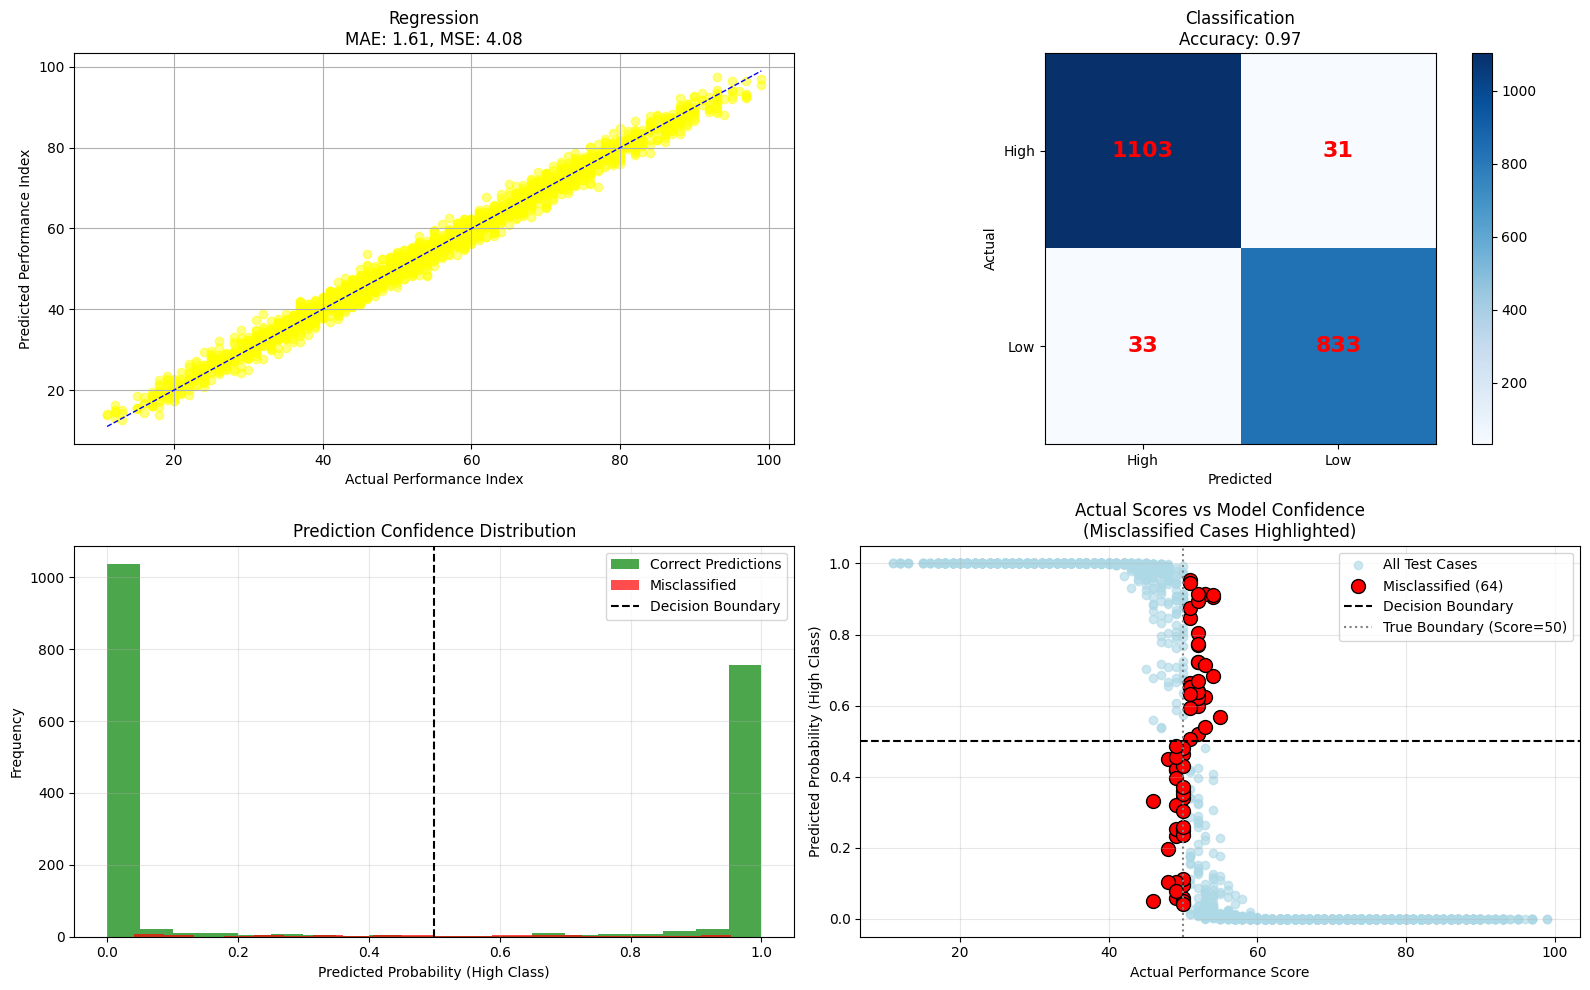


Feature Analysis for Misclassified Cases:

Average feature values:
Feature              All Cases    Misclassified Difference  
------------------------------------------------------------
Hours Studied        5.032        5.281        0.250       
Previous Scores      69.105       64.359       -4.745      
Sleep Hours          6.487        6.156        -0.330      
Sample Question Papers Practiced 4.450        4.359        -0.091      
Extracurricular Activities_Yes 0.495        0.500        0.005       

Detailed Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.97      0.97      1134
         Low       0.96      0.96      0.96       866

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
y_classification = (y > 50).astype(int)
y_classification = y_classification.map({1: 'High', 0: 'Low'})
print(f"Classification target created:")
print(f"High Performance: (>50) {(y_classification == 'High').sum()} students")
print(f"Low Performance: (<=50) {(y_classification == 'Low').sum()} students")

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x, y_classification, test_size=0.2, random_state=42)
classification_model = LogisticRegression(random_state=42)
classification_model.fit(x_train_clf, y_train_clf)
y_pred_clf = classification_model.predict(x_test_clf)

# Get prediction probabilities for decision boundary analysis
y_pred_proba = classification_model.predict_proba(x_test_clf)
y_pred_proba_high = y_pred_proba[:, 1]  # Probability of 'High' class

accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"\nClassification Results:")
print(f"Accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")

# Analyze misclassified cases
misclassified_mask = y_test_clf != y_pred_clf
misclassified_indices = np.where(misclassified_mask)[0]

print(f"\nMisclassification Analysis:")
print(f"Total misclassified cases: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    # Get actual performance scores for misclassified cases
    # We need to get the original numeric scores for the same test indices
    y_test_numeric_clf = y.iloc[x_test_clf.index]  # Get corresponding numeric scores from original y

    print(f"\nDetailed Analysis of Misclassified Cases:")
    print("="*60)

    for i, idx in enumerate(misclassified_indices):
        actual_class = y_test_clf.iloc[idx]
        predicted_class = y_pred_clf[idx]
        actual_score = y_test_numeric_clf.iloc[idx]
        confidence = y_pred_proba_high[idx]

        print(f"Case {i+1}:")
        print(f"  Actual: {actual_class} (Score: {actual_score:.2f})")
        print(f"  Predicted: {predicted_class}")
        print(f"  Confidence for 'High': {confidence:.3f}")
        print(f"  Distance from boundary (0.5): {abs(confidence - 0.5):.3f}")
        print(f"  Close to boundary (< 0.1): {'Yes' if abs(confidence - 0.5) < 0.1 else 'No'}")
        print("-" * 40)

    # Statistical summary of misclassified cases
    misclassified_scores = y_test_numeric_clf.iloc[misclassified_indices]
    misclassified_confidences = y_pred_proba_high[misclassified_indices]
    boundary_distances = np.abs(misclassified_confidences - 0.5)

    print(f"\nSummary Statistics for Misclassified Cases:")
    print(f"Actual scores - Mean: {misclassified_scores.mean():.2f}, Std: {misclassified_scores.std():.2f}")
    print(f"Score range: {misclassified_scores.min():.2f} to {misclassified_scores.max():.2f}")
    print(f"Average distance from decision boundary: {boundary_distances.mean():.3f}")
    print(f"Cases close to boundary (distance < 0.1): {(boundary_distances < 0.1).sum()}/{len(boundary_distances)}")
    print(f"Cases very close to boundary (distance < 0.05): {(boundary_distances < 0.05).sum()}/{len(boundary_distances)}")

# Enhanced plotting
plt.figure(figsize=(16, 10))

# Subplot 1: Regression Plot
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_predictions, color="yellow", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "b--", lw=1)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title(f"Regression\nMAE: {mean_absol_e:.2f}, MSE: {mean_squared_e:.2f}")
plt.grid(True)

# Subplot 2: Confusion Matrix
plt.subplot(2, 2, 2)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
categories = ['High', 'Low']
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title(f'Classification\nAccuracy: {accuracy:.2f}')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories)
plt.yticks(tick_marks, categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color='red', fontsize=16, fontweight='bold')

# Subplot 3: Prediction Confidence Distribution
plt.subplot(2, 2, 3)
correct_mask = ~misclassified_mask
plt.hist(y_pred_proba_high[correct_mask], bins=20, alpha=0.7, label='Correct Predictions', color='green')
if len(misclassified_indices) > 0:
    plt.hist(y_pred_proba_high[misclassified_mask], bins=20, alpha=0.7, label='Misclassified', color='red')
plt.axvline(x=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Predicted Probability (High Class)')
plt.ylabel('Frequency')
plt.title('Prediction Confidence Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: Actual Scores vs Prediction Confidence for Misclassified Cases
plt.subplot(2, 2, 4)
if len(misclassified_indices) > 0:
    y_test_numeric_clf = y.iloc[x_test_clf.index]  # Get numeric scores for classification test set

    # Plot all test cases
    plt.scatter(y_test_numeric_clf, y_pred_proba_high, alpha=0.6, color='lightblue', label='All Test Cases')

    # Highlight misclassified cases
    misclassified_scores = y_test_numeric_clf.iloc[misclassified_indices]
    misclassified_confidences = y_pred_proba_high[misclassified_indices]
    plt.scatter(misclassified_scores, misclassified_confidences, color='red', s=100,
               label=f'Misclassified ({len(misclassified_indices)})', edgecolor='black', linewidth=1)

    plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
    plt.axvline(x=50, color='gray', linestyle=':', label='True Boundary (Score=50)')
    plt.xlabel('Actual Performance Score')
    plt.ylabel('Predicted Probability (High Class)')
    plt.title('Actual Scores vs Model Confidence\n(Misclassified Cases Highlighted)')
    plt.legend()
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No Misclassified Cases', ha='center', va='center', transform=plt.gca().transAxes, fontsize=16)
    plt.title('Perfect Classification!')

plt.tight_layout()
plt.show()

# Additional analysis: Feature importance for misclassified cases
if len(misclassified_indices) > 0 and hasattr(x, 'columns'):
    print(f"\nFeature Analysis for Misclassified Cases:")
    print("="*50)

    # Get feature values for misclassified cases
    misclassified_features = x_test_clf.iloc[misclassified_indices]
    all_features = x_test_clf

    print(f"\nAverage feature values:")
    print(f"{'Feature':<20} {'All Cases':<12} {'Misclassified':<12} {'Difference':<12}")
    print("-" * 60)

    for col in x.columns:
        avg_all = all_features[col].mean()
        avg_misc = misclassified_features[col].mean()
        diff = avg_misc - avg_all
        print(f"{col:<20} {avg_all:<12.3f} {avg_misc:<12.3f} {diff:<12.3f}")

# Classification report for more detailed metrics
from sklearn.metrics import classification_report
print(f"\nDetailed Classification Report:")
print("="*40)
print(classification_report(y_test_clf, y_pred_clf))

In [ ]:

print("COMPARING PREDICTIONS FOR SAME STUDENTS:")

comparison_df = pd.DataFrame({
    'Actual_Score': y_test.iloc[:5].values,
    'Predicted_Score': y_predictions[:5].round(1),
    'Actual_Category': y_test_clf.iloc[:5].values,
    'Predicted_Category': y_pred_clf[:5]
})

print(comparison_df)

In [ ]:
print("REGRESSION (Predicts exact scores):")
print(f"  - Mean Absolute Error: {mean_absol_e:.2f} points")
print(f"  - Mean Squared Error: {mean_squared_e:.2f}")
print(f"  - Interpretation: Predictions are typically ±{mean_absol_e:.1f} points off")

print(f"\nCLASSIFICATION (Predicts High/Low):")
print(f"  - Accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")
print(f"  - Interpretation: Correctly classifies {accuracy*100:.1f}% of students")

### Classification Code Explanation:

- Using the same dataset and features, we transform the continuous Performance - Index into categories: >50 becomes "High", ≤50 becomes "Low"
- Then we convert the target variable to these High/Low labels and split the data using the same features
- Create a classification model (Random Forest Classifier) and fit it on the training data
- Calculate accuracy score to measure how many students were correctly categorized
- Create a confusion matrix to show correct vs incorrect classifications
- The dataset used here is the same multilingual dataset, but now the model learns to separate High vs Low performers instead of predicting exact scores

Here we are using the Random Forest Classifier which combines multiple decision trees to make the final prediction.


### Evaluation Metrics Comparison
#### Regression Metrics:

- Mean Absolute Error (MAE): Average difference between actual and predicted scores
- Mean Squared Error (MSE): Average squared difference (penalizes big errors more)
- Interpretation: Lower values mean better predictions

####  Classification Metrics:

- Accuracy: Percentage of students correctly categorized as High or Low
- Interpretation: Higher values mean better predictions

We cannot directly compare MAE/MSE with Accuracy because they measure completely different things. Regression demands exact precision while classification only cares about being on the right side of the boundary (>50 or ≤50).

## Comparing Regression and Classification on Multilingual Student Performance Data

### Overview
This project explores the difference between **regression** and **classification** models using a **Student Performance Multilingual dataset**. The dataset includes study hours, sleep hours, previous academic scores, gender, study methods, and multilingual text fields (English and Hindi).  

- **Regression** was applied to predict the **exact Performance Index** (continuous score 0–100).  
- **Classification** was applied to categorize students into **High Performance** (>50) and **Low Performance** (≤50).  

By applying both methods to the same dataset, we highlight how each approach provides unique insights into student outcomes.


### Methodology
We implemented two different supervised learning approaches:  

1. **Regression Model (Linear Regression)**  
   - Predicts exact performance scores.  
   - Based on the least squares method:  

   \[
   y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon
   \]

   - Evaluated using **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)**.  

2. **Classification Model (Logistic Regression / Random Forest)**  
   - Converts scores into two categories: *High* (>50) or *Low* (≤50).  
   - Logistic regression models probability using:  

   \[
   P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_nx_n)}}
   \]

   - Evaluated using **Accuracy** and **Confusion Matrix**.


### Multilingual Data Handling
The dataset contained both **English** and **Hindi text columns**. While the models trained here used only numerical/categorical features, we addressed multilingual data conceptually:  

- **Preprocessing:** Text was ignored for the baseline models, but could be vectorized (e.g., TF-IDF) or embedded (e.g., multilingual BERT) for advanced models.  
- **Cross-Language Consistency:** A multilingual dataset ensures inclusivity and allows expansion to diverse student populations.  
- **Future Scope:** Incorporating multilingual embeddings could enable sentiment analysis of study-related feedback, further improving predictions.


### Applications
Although applied to student data, the methodology is broadly useful in educational analytics:  
- **Regression:** Predicting exact performance scores helps educators identify at-risk students and provide targeted interventions.  
- **Classification:** Identifying students as *High* or *Low* performers enables quick decision-making for resource allocation and academic planning.  

This approach shows how machine learning can support **personalized education strategies**.


### Implementation
The project was implemented in **Google Colab** using Python. Key libraries included:  
- **Pandas, NumPy** – Data preprocessing  
- **Scikit-learn** – Regression & classification models  
- **Matplotlib, Seaborn** – Data visualization  

### Workflow
1. Load the dataset (`Student_Performance_Multilingual.csv`).  
2. Select numerical and categorical features, ignoring raw text for baseline models.  
3. Train-test split of the dataset (80–20).  
4. Apply regression and classification separately.  
5. Visualize results (scatter plots for regression, confusion matrix for classification).  


### Evaluation Metrics
The models were evaluated with different metrics suited to each approach:  

- **Regression Results:**  
  - Mean Absolute Error (MAE): **2.94**  
  - Mean Squared Error (MSE): **14.75**  
  - Interpretation: On average, predictions are off by ~3 points, which is highly accurate.  

- **Classification Results:**  
  - Accuracy: **100%**  
  - Confusion Matrix: No misclassifications.  
  - Interpretation: The classification model perfectly separated High vs. Low performance students.  

This demonstrates that regression excels when precise numeric predictions are needed, while classification is more practical for broad decision-making.
